In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [2]:
data_dir = '../Data'
os.listdir(data_dir)

['sample_submission.csv',
 'train.csv',
 'test.csv',
 'train_data_after_cleaning.csv']

In [3]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
28619,id2895955,2,2016-05-26 20:43:25,2016-05-26 21:24:27,2,-73.983429,40.771210,-73.987747,40.719879,N,2462
340436,id2260530,2,2016-03-22 23:34:31,2016-03-22 23:43:32,1,-74.000793,40.728840,-73.977852,40.745930,N,541
425974,id2013052,1,2016-04-29 22:37:39,2016-04-29 22:43:34,1,-73.985397,40.727573,-73.983238,40.722229,N,355
961815,id2947736,2,2016-05-27 11:12:17,2016-05-27 11:34:41,1,-73.961540,40.795860,-73.988342,40.772442,N,1344
1267998,id3348229,2,2016-04-18 13:41:47,2016-04-18 13:51:32,2,-73.983459,40.749817,-73.973106,40.756107,N,585
55937,id2132726,2,2016-06-01 21:47:06,2016-06-01 22:04:12,1,-73.954567,40.732201,-73.949654,40.678471,N,1026
854766,id2425098,2,2016-05-08 10:36:30,2016-05-08 10:49:26,2,-73.979691,40.761250,-73.961304,40.778519,N,776
861277,id1978908,2,2016-02-16 08:11:51,2016-02-16 08:19:17,5,-73.978851,40.744850,-73.989021,40.742432,N,446
1253629,id3389200,2,2016-06-03 22:06:34,2016-06-03 22:17:08,6,-73.950958,40.710564,-73.960884,40.718895,N,634
887609,id2187087,2,2016-03-08 09:37:03,2016-03-08 09:42:45,2,-74.002434,40.739960,-74.003708,40.749298,N,342


In [4]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
33147,id1891233,2,2016-06-20 22:44:07,1,-73.983620,40.744221,-73.979500,40.749496,N
256158,id3435802,2,2016-04-17 00:43:45,1,-73.990288,40.719231,-73.996597,40.720482,N
470653,id1356719,2,2016-02-17 09:14:39,1,-73.870636,40.773659,-73.777908,40.783401,N
94153,id1597340,1,2016-06-02 21:19:41,1,-73.981987,40.743351,-73.985039,40.724087,N
203955,id2806601,2,2016-05-02 08:30:22,1,-73.994919,40.750072,-73.955795,40.763882,N
117345,id0994872,2,2016-05-26 11:15:18,1,-73.940903,40.792801,-73.957474,40.761082,N
88368,id1599277,2,2016-06-04 12:47:05,5,-74.002068,40.729847,-74.001717,40.756405,N
526354,id2506349,1,2016-02-01 12:11:35,1,-73.990433,40.771633,-74.013252,40.716335,N
203169,id0048967,2,2016-05-02 13:11:04,1,-73.981277,40.781036,-73.974892,40.787949,N
60138,id0772539,2,2016-06-12 17:25:48,1,-73.989594,40.736797,-74.002846,40.733585,N


In [5]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
# remove outliers
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - 5 * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + 5 * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06
mean,1.534303e+00,1.663950e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,8.376007e+02
std,4.988221e-01,1.313619e+00,7.093200e-02,3.288342e-02,7.067477e-02,3.588855e-02,6.694573e+02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,2.706400e+04


In [7]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date


In [8]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
271587,id0922458,1,2016-05-18 19:40:23,2016-05-18 19:46:07,1,-73.953560,40.771294,-73.942070,40.787090,N,344,2016-05-18,18,19,5,2
748424,id2405609,2,2016-03-15 14:52:48,2016-03-15 15:23:15,1,-74.011116,40.711243,-73.966072,40.761490,N,1827,2016-03-15,15,14,3,1
1193173,id2556341,2,2016-01-02 11:22:13,2016-01-02 11:26:11,6,-73.974556,40.760723,-73.966782,40.761234,N,238,2016-01-02,2,11,1,5
880555,id2923968,2,2016-04-02 21:35:34,2016-04-02 21:43:24,1,-73.987099,40.733017,-74.000969,40.746265,N,470,2016-04-02,2,21,4,5
1172372,id2338679,1,2016-06-02 07:31:07,2016-06-02 07:35:01,1,-73.986992,40.766151,-73.979012,40.765316,N,234,2016-06-02,2,7,6,3
591735,id2478371,2,2016-03-31 13:03:50,2016-03-31 13:07:41,2,-73.975388,40.761349,-73.970047,40.759209,N,231,2016-03-31,31,13,3,3
1268508,id0512507,2,2016-05-26 15:40:31,2016-05-26 15:54:18,2,-74.008179,40.737480,-74.011246,40.728882,N,827,2016-05-26,26,15,5,3
1139542,id3415318,1,2016-02-08 17:27:33,2016-02-08 17:34:43,1,-73.972046,40.753525,-73.978844,40.758160,N,430,2016-02-08,8,17,2,0
1458420,id3542490,2,2016-03-07 21:35:25,2016-03-07 21:47:42,1,-73.996368,40.723660,-73.975166,40.689621,N,737,2016-03-07,7,21,3,0
1346180,id1067177,1,2016-04-14 00:37:39,2016-04-14 00:49:38,1,-73.985962,40.752193,-73.949486,40.781708,N,719,2016-04-14,14,0,4,3


In [9]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

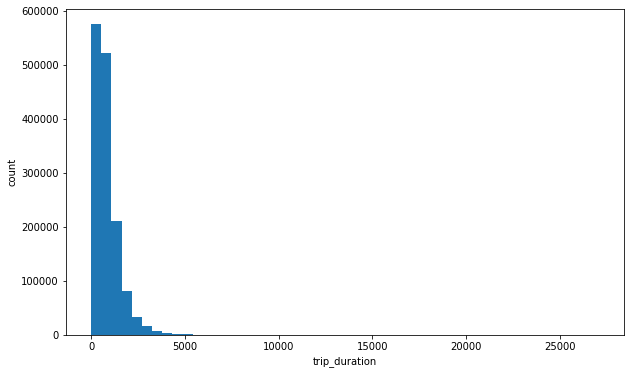

In [10]:
show_hist('trip_duration')

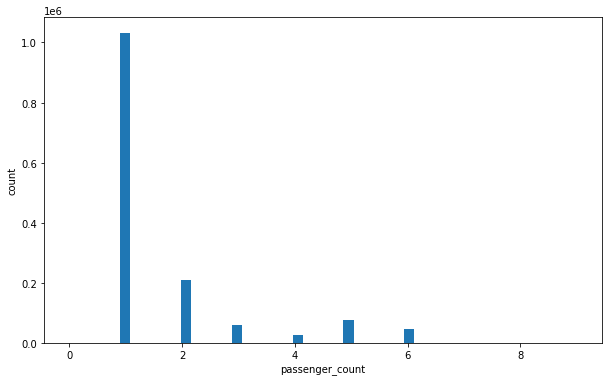

In [11]:
show_hist('passenger_count')

In [12]:
# sns.barplot(x='passenger_count', y='trip_duration', hue='store_and_fwd_flag', data = train_df)

In [13]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [14]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [15]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,haversine_distance,manhattan_distance,direction
843742,id2680731,1,2016-02-25 11:39:58,2016-02-25 11:50:50,1,-73.971024,40.798450,-73.982246,40.776787,N,652,2016-02-25,25,11,2,3,2.587564,3.353583,-158.579552
353530,id0268452,1,2016-04-26 00:42:41,2016-04-26 00:47:00,1,-73.968826,40.757023,-73.976021,40.744564,N,259,2016-04-26,26,0,4,1,1.512116,1.991339,-156.370107
787236,id2834180,2,2016-03-18 21:56:14,2016-03-18 22:07:01,2,-73.994530,40.727749,-74.007652,40.705559,N,647,2016-03-18,18,21,3,4,2.703950,3.573206,-155.852562
1093257,id1602803,1,2016-05-06 12:49:47,2016-05-06 13:13:18,1,-73.954659,40.789448,-73.955330,40.767456,N,1411,2016-05-06,6,12,5,4,2.446022,2.501891,-178.675462
243228,id0422561,2,2016-06-24 20:51:47,2016-06-24 20:54:15,1,-73.985992,40.752529,-73.990311,40.756401,N,148,2016-06-24,24,20,6,4,0.563617,0.794281,-40.190833
119524,id1656851,1,2016-04-30 11:42:58,2016-04-30 11:59:11,1,-73.984581,40.742397,-73.950417,40.784061,N,973,2016-04-30,30,11,4,5,5.453654,7.511090,31.832309
158406,id3444800,2,2016-05-12 18:54:01,2016-05-12 19:01:39,2,-73.986069,40.752571,-73.997948,40.740891,N,458,2016-05-12,12,18,5,3,1.639618,2.299438,-142.383018
1324656,id1120829,2,2016-02-23 10:45:40,2016-02-23 10:53:10,1,-73.970726,40.794224,-73.952446,40.789646,N,450,2016-02-23,23,10,2,1,1.620887,2.047847,108.296400
777090,id1169445,2,2016-05-23 08:28:26,2016-05-23 08:57:30,1,-74.009949,40.705620,-73.987411,40.729271,N,1744,2016-05-23,23,8,5,0,3.244078,4.529629,35.830950
32841,id0126697,2,2016-05-15 21:28:32,2016-05-15 21:38:40,1,-73.999840,40.726822,-73.979599,40.714771,N,608,2016-05-15,15,21,5,6,2.169147,3.045594,128.144677


In [16]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction' ]
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Convert categorical data into dummy or indicator variables.
# We have few categorical columns and few classes for each column
# So, we can use the OneHotEncoder
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

In [17]:
train_df.sample(10)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,haversine_distance,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
1363226,id1948272,2016-01-28 13:36:40,2016-01-28 13:50:01,-73.973427,40.760811,-73.982079,40.775051,801,2016-01-28,0.001405,...,0,0,0,0,0,0,1,0,0,0
189862,id3283094,2016-01-01 10:05:01,2016-01-01 10:06:03,-74.004501,40.742207,-74.004662,40.737461,62,2016-01-01,0.000425,...,0,0,0,0,0,0,0,1,0,0
1087395,id1705234,2016-01-20 08:46:50,2016-01-20 08:57:29,-73.999283,40.754478,-73.983864,40.762920,639,2016-01-20,0.001291,...,0,0,0,0,0,1,0,0,0,0
822798,id2615122,2016-02-27 20:13:07,2016-02-27 20:18:20,-73.997299,40.724483,-73.998856,40.717106,313,2016-02-27,0.000669,...,0,0,0,0,0,0,0,0,1,0
550209,id2957122,2016-01-09 14:55:48,2016-01-09 15:00:30,-73.962379,40.773254,-73.954124,40.770657,282,2016-01-09,0.000607,...,0,0,0,0,0,0,0,0,1,0
1429790,id1935388,2016-06-23 23:57:28,2016-06-24 00:08:31,-74.000771,40.737110,-73.978691,40.724419,663,2016-06-23,0.001882,...,0,0,1,0,0,0,1,0,0,0
764035,id2206088,2016-02-14 17:09:06,2016-02-14 17:23:42,-74.001518,40.709782,-73.976303,40.714985,876,2016-02-14,0.001775,...,0,0,0,0,0,0,0,0,0,1
38961,id3807009,2016-06-30 23:07:08,2016-06-30 23:26:06,-73.983582,40.725891,-73.962952,40.719112,1138,2016-06-30,0.001527,...,0,0,1,0,0,0,1,0,0,0
8869,id0922418,2016-01-08 15:13:36,2016-01-08 15:16:29,-73.968445,40.750824,-73.969467,40.754040,173,2016-01-08,0.000296,...,0,0,0,0,0,0,0,1,0,0
1074780,id1997403,2016-03-17 13:30:27,2016-03-17 13:51:13,-73.969589,40.785744,-73.954597,40.778114,1246,2016-03-17,0.001226,...,0,0,0,0,0,0,1,0,0,0


In [18]:
train_drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
train_df = train_df.drop(train_drop_cols, axis = 1)
train_df.sample(10)

,trip_duration,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
481305,1854,0.003827,0.005092,0.128990,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1424023,546,0.001226,0.001406,0.040348,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
680504,88,0.000284,0.000367,0.164302,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
708022,498,0.001540,0.001736,0.285821,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
521525,844,0.001762,0.001869,0.728130,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
205928,629,0.001645,0.002000,0.191650,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
894390,1181,0.002296,0.003056,0.121972,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
326672,469,0.002034,0.002707,0.124019,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
159814,2979,0.009207,0.009770,0.021869,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
597697,632,0.000780,0.000942,0.944094,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
test_drop_cols = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
test_df = test_df.drop(test_drop_cols, axis = 1)

In [20]:
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
611685,0.001826,0.001764,0.254270,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
109809,0.002556,0.002452,0.503051,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
175649,0.000875,0.000906,0.766803,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
119859,0.001233,0.001438,0.795166,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
331120,0.000656,0.000707,0.525086,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
233615,0.001247,0.001259,0.487955,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
91487,0.000925,0.001186,0.331734,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
590272,0.001955,0.001964,0.488805,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
226064,0.001326,0.001426,0.225237,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
110414,0.001532,0.001931,0.427009,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [21]:
# The test_df has 83 columns while train_df has 86 columns 
missed_cols = list(set(train_df.columns) - set(test_df.columns))
missed_cols

['trip_duration', 'passenger_count_7', 'passenger_count_8']

In [22]:
test_df['passenger_count_7'] = 0
test_df['passenger_count_8'] = 0
test_df = test_df[list(train_df.columns.values)[1:]]
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
363046,0.001793,0.002382,0.134677,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
493427,0.002569,0.002942,0.460168,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
136200,0.001956,0.002184,0.783341,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
540866,0.000659,0.000828,0.928622,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
198803,0.001500,0.001986,0.641069,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
561253,0.004703,0.005826,0.065461,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
223786,0.000922,0.001180,0.580862,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
587507,0.002954,0.003918,0.887659,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
115890,0.001515,0.001894,0.930663,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
177243,0.015872,0.017561,0.468904,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [23]:
train_data, val_data = train_test_split(train_df[0:500000], test_size=0.2, random_state=42)

In [24]:
train_X = train_data.drop(['trip_duration'], axis=1)
train_y = train_data["trip_duration"]
val_X = val_data.drop(['trip_duration'], axis=1)
val_y = val_data["trip_duration"]

print(train_X.shape, train_y.shape)

(400000, 85) (400000,)


In [25]:
model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_X, train_y)

In [ ]:
model.score(val_X, val_y), model.score(train_X, train_y)

(0.7000734463784656, 0.9598084384250036)

In [ ]:
train_preds = model.predict(train_X)
train_rmsle = mean_squared_log_error(train_y, train_preds, squared=False)
print("Training RMSLE: ", train_rmsle)

val_preds = model.predict(val_X)
val_rmsle = mean_squared_log_error(val_y, val_preds, squared=False)
print("Validation RMSLE: ", val_rmsle)

Training RMSLE:  0.2160115099793296
Validation RMSLE:  0.44511645080050877
